# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID: 1  
TEAM-NAME: curiosity   
YOUR-ID: 1  
YOUR-NAME: Gowri Lekshmy    

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [1]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time
from numpy import linalg as LA

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [114]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################

def gaussian(x,a,m,s):
    return a*np.exp(-((x-m)**2)/(2*s**2))

def Jacobian_of_residual(x,a,m,s):
    J_r1 = gaussian(x,a,m,s)/a
    J_r2 = (x - m)*gaussian(x,a,m,s)/(s**2)
    J_r3 = ((x - m)**2)*gaussian(x,a,m,s)/(s**3)
    J_r = np.array([J_r1, J_r2, J_r3]).T
    return J_r

def plotter(x,y,y_pred,no_iter,residual_2,algo):
    plt.figure(figsize=(10,10)) 
    plt.subplot(2,1,1)
    line1, = plt.plot(x,y, label="Ground Truth", linestyle='--')
    line2, = plt.plot(x,y_pred, label="Predicted", linewidth=4)
    first_legend = plt.legend(handles=[line1], loc='upper right')
    ax = plt.gca().add_artist(first_legend)
    plt.legend(handles=[line2], loc='lower right')
    plt.title(('Ground Truth vs Predicted Gaussian - {}').format(algo))
    
    plt.subplot(2,1,2)
    x_axis = np.arange(no_iter)
    plt.plot(x_axis,residual_2)
    plt.title('Cost function ||r^2|| vs number of iterations')
    plt.show()    

    
#1.1 Gradient Descent

def Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text,noise=False):
    x = np.linspace(-25, 25, num=no_obs)
    if noise == False:
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) for x_i in x]
    else:
        mu, sigma =5,10 # mean and standard deviation
        noise = np.random.normal(mu, sigma, no_obs)
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) + noise_i for x_i,noise_i in zip(x,noise)]
        
    k_t = k_0
    residual_2 = []

    for i in range(no_iter):
        a = k_t[0]
        m = k_t[1]
        s = k_t[2]
#         print(a,m,s)

        J_r = Jacobian_of_residual(x,a,m,s)
        residual = [(gaussian(x_i,a,m,s) - y_i) for x_i,y_i in zip(x,y)]
        residual = np.array(residual).reshape(no_obs,-1)
        residual_2.append(LA.norm(residual,2)) 
        J_F = J_r.T@residual
        
        del_k = -lr*J_F
        k_t_1 = k_t + del_k

#         if np.max(np.abs(k_t_1 - k_t)) < tol:
        if LA.norm(residual,2) < tol:
            for j in range(no_iter - i -1):
                residual_2.append(LA.norm(residual,2)) 
            break
        else:
            k_t = k_t_1
    
    print("*********************************************************************")
    print(("GRADIENT DESCENT - {}").format(text))
    print("*********************************************************************")
    print(("Ground Truth a,m,s values:{}").format(gt))
    print(("Predicted a,m,s values:{}").format(k_t_1.T))
    print(("Initial Estimate:{}").format(k_0.T))
    print(("No of iterations to converge:{}").format(i+1))
    print(("Learning Rate:{}").format(lr))
    print(("Tolerance :{}").format(tol))
    print(("No of Observations:{}").format(no_obs))
    print(("Residual Error :{}").format(residual_2[-1]))
    algo = "GRADIENT DESCENT"
    y_pred = [gaussian(x_i,k_t_1[0],k_t_1[1],k_t_1[2]) for x_i in x]   
    plotter(x,y,y_pred,no_iter,residual_2,algo)
    



In [115]:
def Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text,noise=False):
    x = np.linspace(-25, 25, num=no_obs)
    if noise == False:
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) for x_i in x]
    else:
        mu, sigma = 5,10 # mean and standard deviation
        noise = np.random.normal(mu, sigma, no_obs)
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) + noise_i for x_i,noise_i in zip(x,noise)]

    k_t = k_0
    residual_2 = []

    for i in range(no_iter):
        a = k_t[0]
        m = k_t[1]
        s = k_t[2]
#         print(a,m,s)

        J_r = Jacobian_of_residual(x,a,m,s)
        residual = [(gaussian(x_i,a,m,s) - y_i) for x_i,y_i in zip(x,y)]
        residual = np.array(residual).reshape(no_obs,-1)
        residual_2.append(LA.norm(residual,2)) 
        
        J_F = J_r.T@residual

        inv = LA.pinv(J_r.T@J_r)

        del_k = -inv@J_F
        k_t_1 = k_t + del_k

        if np.max(np.abs(k_t_1 - k_t)) < tol:
            for j in range(no_iter - i -1):
                residual_2.append(LA.norm(residual,2)) 
            break
        else:
            k_t = k_t_1
    
    print("*********************************************************************")
    print(("GAUSS NEWTON - {}").format(text))
    print("*********************************************************************")
    print(("Ground Truth a,m,s values:{}").format(gt))
    print(("Predicted a,m,s values:{}").format(k_t_1.T))
    print(("Initial Estimate:{}").format(k_0.T))
    print(("No of iterations to converge:{}").format(i+1))
    print(("Tolerance :{}").format(tol))
    print(("No of Observations:{}").format(no_obs))
    print(("Residual Error :{}").format(residual_2[-1]))
    
    algo = "GAUSS NEWTON"
    y_pred = [gaussian(x_i,k_t_1[0],k_t_1[1],k_t_1[2]) for x_i in x]   
    plotter(x,y,y_pred,no_iter,residual_2,algo)
    


# tol = 1e-3 #tolerance
# no_iter = 400
# Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol)

In [116]:
def LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text,noise=False):
    x = np.linspace(-25, 25, num=no_obs)
    if noise == False:
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) for x_i in x]
    else:
        mu, sigma = 5,10 # mean and standard deviation
        noise = np.random.normal(mu, sigma, no_obs)
        y = [gaussian(x_i,gt[0],gt[1],gt[2]) + noise_i for x_i,noise_i in zip(x,noise)]

    k_t = k_0
    residual_2 = []
    lambda0 = lambda_
    for i in range(no_iter):
        a = k_t[0]
        m = k_t[1]
        s = k_t[2]
#         print(a,m,s)

        J_r = Jacobian_of_residual(x,a,m,s)
        residual = [(gaussian(x_i,a,m,s) - y_i) for x_i,y_i in zip(x,y)]
        residual = np.array(residual).reshape(no_obs,-1)
        res_2 = LA.norm(residual,2)
        residual_2.append(res_2) 
        
        J_F = J_r.T@residual
        l_term = lambda_*np.eye(3)
        inv = LA.pinv(J_r.T@J_r + l_term)
        del_k = -inv@J_F
        k_t_1 = k_t + del_k


        if np.max(np.abs(k_t_1 - k_t)) < tol:
            for j in range(no_iter - i - 1):
                residual_2.append(LA.norm(residual,2)) 
            break
        else:
            
            a = k_t_1[0]
            m = k_t_1[1]
            s = k_t_1[2]
            
            residual_new = [(gaussian(x_i,a,m,s) - y_i) for x_i,y_i in zip(x,y)]
            residual_new = np.array(residual).reshape(no_obs,-1)
            residual_2_new = LA.norm(residual_new,2)
            change = residual_2_new - res_2
            
            if change <= 0:
                lambda_ = lambda_/10
                k_t = k_t_1
            else:
                lambda_ = lambda_*10
    
    print("*********************************************************************")
    print(("LM Algorithm - {}").format(text))
    print("*********************************************************************")
    print(("Ground Truth a,m,s values:{}").format(gt))
    print(("Predicted a,m,s values:{}").format(k_t_1.T))
    print(("Initial Estimate:{}").format(k_0.T))
    print(("No of iterations to converge:{}").format(i+1))
    print(("Tolerance :{}").format(tol))
    print(("No of Observations:{}").format(no_obs))
    print(("Lambda :{}").format(lambda0))
    print(("Residual Error :{}").format(residual_2[-1]))

    algo = "LM"
    y_pred = [gaussian(x_i,k_t_1[0],k_t_1[1],k_t_1[2]) for x_i in x]   
    plotter(x,y,y_pred,no_iter,residual_2,algo)





##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

*********************************************************************
GRADIENT DESCENT - FOR 450 ITERATIONS
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[9.98600528e+00 2.71904013e-04 2.00778781e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:450
Learning Rate:0.01
Tolerance :1e-15
No of Observations:50
Residual Error :0.0871313194611397


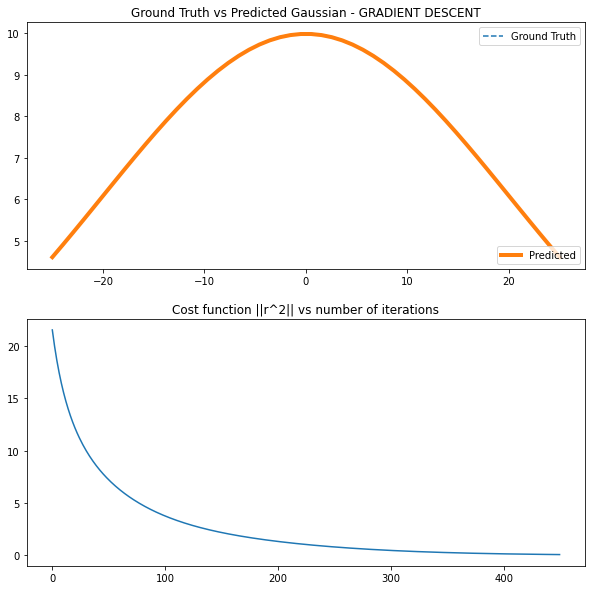

*********************************************************************
GRADIENT DESCENT - FOR 200 ITERATIONS
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 9.78969014  0.22122018 21.25474267]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:200
Learning Rate:0.01
Tolerance :1e-15
No of Observations:50
Residual Error :1.348829203787521


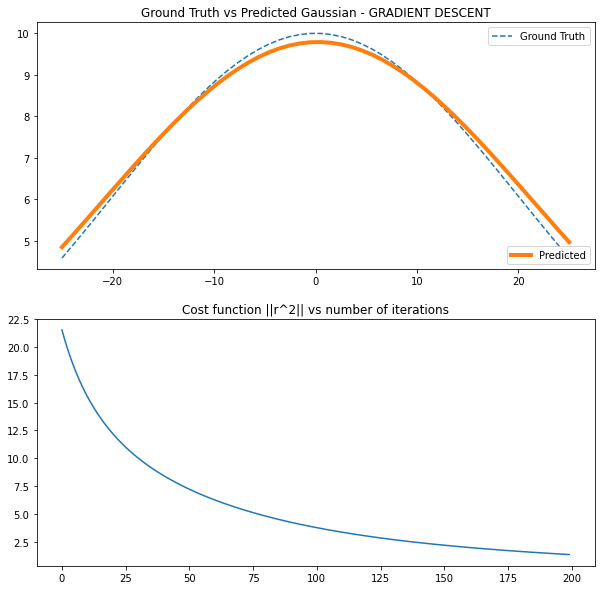

In [15]:
# Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #

############################### 1.1 ##########################################

# Fixing Hyperparameters
a_gt = 10
m_gt = 0
s_gt = 20
gt = [a_gt,m_gt,s_gt]

no_obs = 50
lr = 0.01 #learning rate
tol = 1e-15 #tolerance

no_iter = 450
k_0 = [10,13,19.12] #intial estimate
k_0 = np.array(k_0).reshape(3,-1)

text = "FOR 450 ITERATIONS"
Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text)

no_iter = 200
text = "FOR 200 ITERATIONS"
Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text)
#############################################################################

### Experimenting with Number of Iterations

The graphs above depict the effect of number of iterations on the convergence of Gradient Descent Algorithm. It is observed from the cost function graph that cost reduces with number of iterations.

A suitable learning rate of 0.01 was fixed which determines the length of each step while moving in the direction of descent.

We have plotted for both 450 and 200 iterations after keeping the other hyperparameters constant. In Gradient Descent algorithm, we reduce the sum of squared error (residual error) by updating the parameters in the steepest direction. From above, the least square curve fits better on going through more number of iterations as the on each iteration, the parameters get updated in such a way the residual error becomes closer to zero. 

*********************************************************************
GAUSS NEWTON - FOR BEST HYPERPARAMETERS
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 1.00000000e+01 -5.05508616e-16  2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:8
Tolerance :1e-15
No of Observations:50
Residual Error :1.7763568394002505e-15


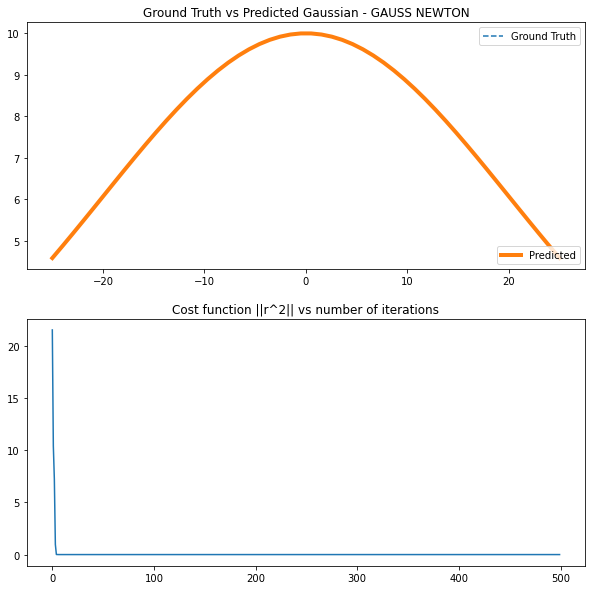

*********************************************************************
LM Algorithm - FOR BEST HYPERPARAMETERS
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[1.00000000e+01 2.04641601e-16 2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:9
Tolerance :1e-15
No of Observations:50
Lambda :5
Residual Error :0.0


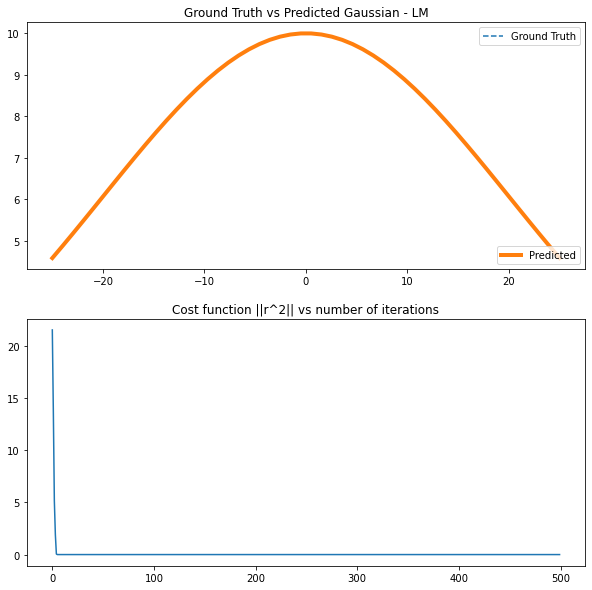

In [43]:
############################### 1.2 ##########################################

#GAUSS NEWTON
no_obs = 50
lr = 0.01 #learning rate
tol = 1e-15 #tolerance
no_iter = 500
k_0 = [10,13,19.12] #intial estimate
k_0 = np.array(k_0).reshape(3,-1)

text = "FOR BEST HYPERPARAMETERS"
Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text)

#LM ALGORITHM
no_obs = 50
lr = 0.01 #learning rate
tol = 1e-15 #tolerance
no_iter = 500
k_0 = [10,13,19.12] #intial estimate
k_0 = np.array(k_0).reshape(3,-1)
lambda_ = 5

LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)

### Gauss Newton and Levenberg–Marquardt algorithm

The above graphs were obtained by experimenting and tuning hyperparameters for Gauss Newton and Levenberg–Marquardt algorithm. Similar hyperparameters were fixed for both the algorithms with an additional lambda term (damping coefficient) of 5 for the LM algorithm. 

We observed Gradient descent takes longer to converge (450 iterations) than LM algorithm and Gauss Newton with 9 iterations and 8 iterations respectively. 

The final predicted values for each algorithm is: 
* Gauss Newton - [10 -5.05508616e-16 20]
* LM Algorithm - [10 2.04641601e-16  20]

LM Algorithm has predicted values that are closer to the ground truth than Gauss Newton.

An inital estimate of 10,13,19.12 close to the ground truth was chosen. It is generally observed that there is better convergence on carefully choosing an intial estimate close to the actual value.

Levenberg–Marquardt algorithm being a combination of both the gradient descent and Gauss Newton algorithm. When the damping parameter is large, it behave more like gradient descent otherwise becomes similar to Gauss Newton.
Here, initial lambda being 5, LM behaves similar to gradient descent in the beginning, then later the error is evaluated with the new estimated parameter.

If the error increased as a result of an update, then the step is retracted and the parameters are reset to their previous values and lambda is increased by a factor of 10. 
But if the error has decreased as a result of the update, then the new parameters are used and lambda is decreased by a factor of 10. This is done till convergence.

Convergence criterion used for both algorithms is when the update parameter (del_k) reaches below a tolerance value of 1e-15 or when it reaches maximum number of iterations i.e, 500 iterations here.


# DIFFERENT INTIAL ESTIMATE

*********************************************************************
GRADIENT DESCENT - DIFFERENT INITIAL ESTIMATE [100,10,125]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[  7.95592084  14.0787492  123.62693611]]
Initial Estimate:[[100  10 125]]
No of iterations to converge:500
Learning Rate:0.01
Tolerance :1e-15
No of Observations:50
Residual Error :12.052817107813755


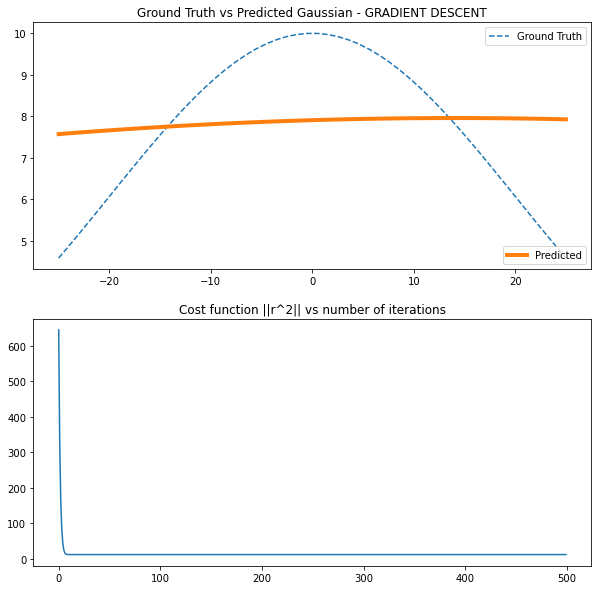

*********************************************************************
GAUSS NEWTON - DIFFERENT INITIAL ESTIMATE [100,10,125]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 7.88373528e+00  4.76892308e+18 -4.53945255e+19]]
Initial Estimate:[[100  10 125]]
No of iterations to converge:11
Tolerance :1e-15
No of Observations:50
Residual Error :12.374354495795345


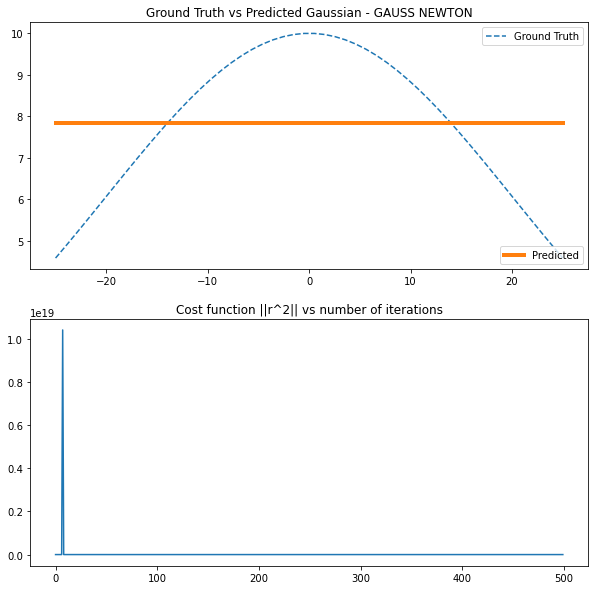

*********************************************************************
LM Algorithm - DIFFERENT INITIAL ESTIMATE [100,10,125]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 1.00000000e+01 -4.25494112e-16 -2.00000000e+01]]
Initial Estimate:[[100  10 125]]
No of iterations to converge:9
Tolerance :1e-15
No of Observations:50
Lambda :0.001
Residual Error :0.0


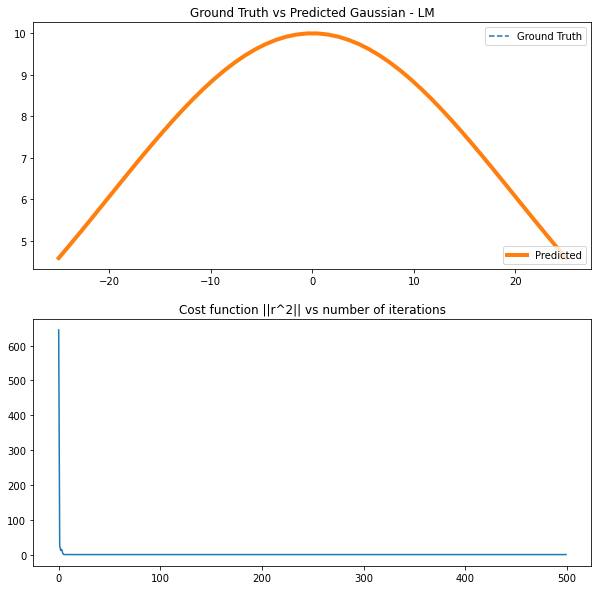

In [57]:
# no_iter = 100
# Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol)
def reintialize():
    global a_gt,m_gt,s_gt,no_obs,lr,tol,no_iter,k_0,gt
    a_gt = 10
    m_gt = 0
    s_gt = 20
    gt = [a_gt,m_gt,s_gt]

    no_obs = 50
    lr = 0.01 #learning rate
    tol = 1e-15 #tolerance
    no_iter = 500
    k_0 = [10,13,19.12] #intial estimate
    k_0 = np.array(k_0).reshape(3,-1)

################################## EXPERIMENTS ###############################


# Different initial estimate
text = "DIFFERENT INITIAL ESTIMATE [100,10,125]"
reintialize()
k_0 = [100,10,125] #intial estimate
k_0 = np.array(k_0).reshape(3,-1)

Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text)
Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text)
lambda_ = 0.001
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)

### Using an intial estimate far from ground truth

The above graphs were plotted using an intial estimate of [100  10 125] far from the ground truth value of [10, 0, 20]. We can observe from above that the LM algorithm is least hindered among all three by the change in intial estimate. It is observed that LM algorithm converges within 9 iterations. Only LM algortihm has a curve fitting plot, this could be due to the robust nature of LM algorithm. Gradient descent and Gauss Newton do not converge at all in comparison to LM algorithm. 

However on trying with an initial estimate of [100 100 200] extremely far from the ground truth, it was observed that there was no convergence for all three algorithms as shown in the three graphs below.

*********************************************************************
GRADIENT DESCENT - DIFFERENT INITIAL ESTIMATE [100,100,200]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[  9.39242182 115.30838714 191.92999202]]
Initial Estimate:[[100 100 200]]
No of iterations to converge:500
Learning Rate:0.01
Tolerance :1e-15
No of Observations:50
Residual Error :12.542847129619654


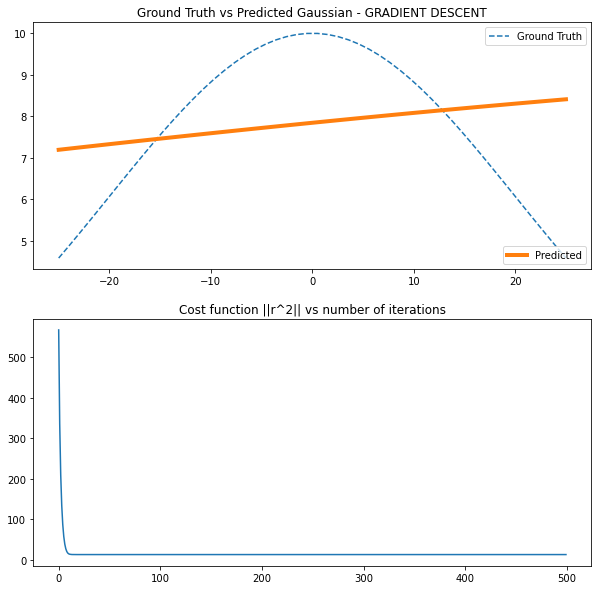

*********************************************************************
GAUSS NEWTON - DIFFERENT INITIAL ESTIMATE [100,100,200]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[7.84728270e+00 4.94749054e+06 1.17678234e+08]]
Initial Estimate:[[100 100 200]]
No of iterations to converge:10
Tolerance :1e-15
No of Observations:50
Residual Error :12.374354495794961


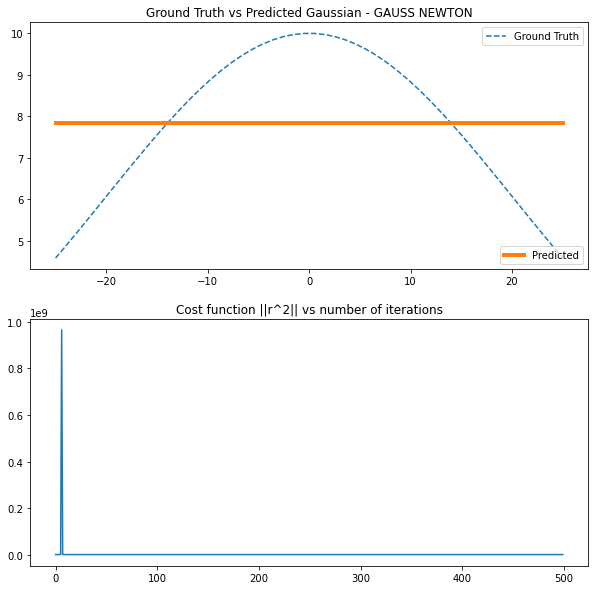

*********************************************************************
LM Algorithm - DIFFERENT INITIAL ESTIMATE [100,100,200]
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[7.92782546e+00 1.51233620e+04 1.01523141e+05]]
Initial Estimate:[[100 100 200]]
No of iterations to converge:13
Tolerance :1e-15
No of Observations:50
Lambda :0.001
Residual Error :12.374354046635164


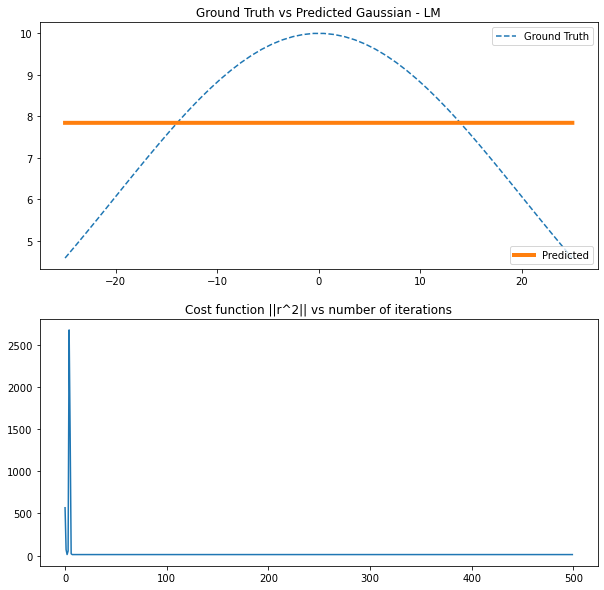

In [58]:
# Different initial estimate
text = "DIFFERENT INITIAL ESTIMATE [100,100,200]"
reintialize()
k_0 = [100,100,200] #intial estimate
k_0 = np.array(k_0).reshape(3,-1)

Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text)
Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text)
lambda_ = 0.001
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)

# DIFFERENT NUMBER OF OBSERVATIONS

*********************************************************************
GRADIENT DESCENT - NUMBER OF OBSERVATIONS = 6
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 9.52584395  3.52629956 22.44987909]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:500
Learning Rate:0.01
Tolerance :1e-15
No of Observations:6
Residual Error :2.0507310900936786


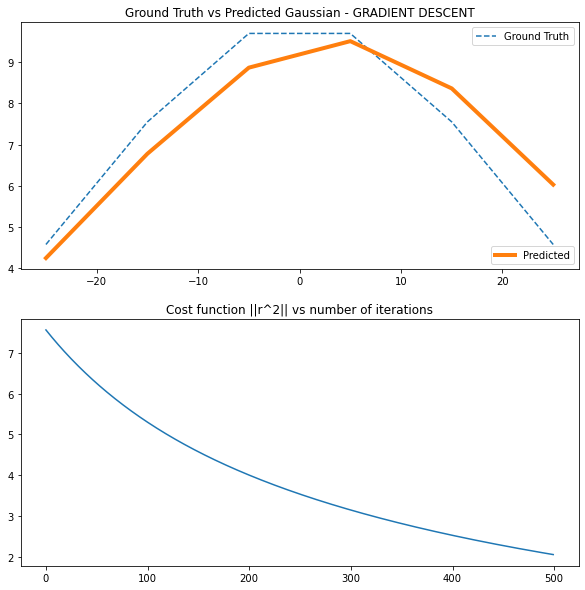

*********************************************************************
GAUSS NEWTON - NUMBER OF OBSERVATIONS = 6
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 1.0000000e+01 -1.7086698e-16  2.0000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:7
Tolerance :1e-15
No of Observations:6
Residual Error :0.0


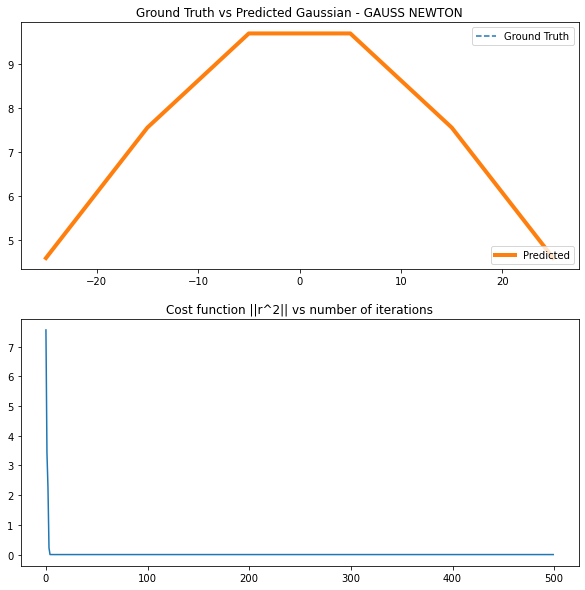

*********************************************************************
LM Algorithm - NUMBER OF OBSERVATIONS = 6
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[1.00000000e+01 3.23699753e-16 2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:9
Tolerance :1e-15
No of Observations:6
Lambda :5
Residual Error :0.0


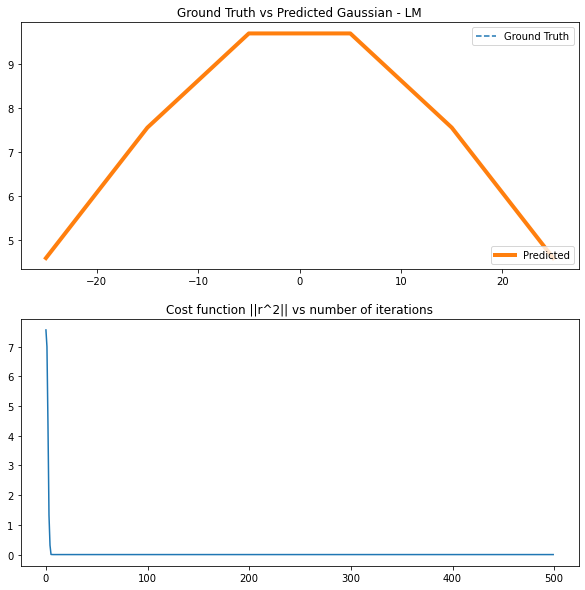

In [72]:
# Different number of observations
text = "NUMBER OF OBSERVATIONS = 6"
reintialize()

no_obs = 6
Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text)
# no_iter = 850
# reintialize()
Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text)
lambda_ = 5
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)

### Reducing Number of Observations

We can observe from the above three graphs that reducing the number of observations to 6 values has lesser effect on both Gauss Newton and LM algorithm in comparison to Gradient Descent. LM algorithm was tested with lambda=5.
Even after 500 iterations of Gradient Descent, it is observed with less convergence, whereas the Gauss Newton  and LM algorithm converged in just 7 and 9 iterations respectively.

From the above results, we can conclude that Gauss Newton and LM algorithm are the best algorithms among all three that are able to generalize well even with less amount of data provided. 

# ADDING NOISE TO OBSERVATIONS

*********************************************************************
GRADIENT DESCENT - ADDED NOISE WITH MEAN=5 & STANDARD DEV=10
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[14.38322675  1.63312198 25.21536278]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:500
Learning Rate:0.01
Tolerance :1e-15
No of Observations:50
Residual Error :58.180553256133756


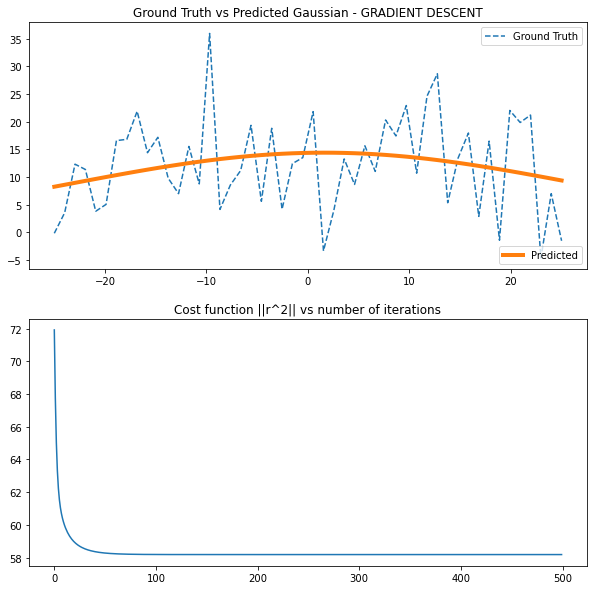

*********************************************************************
GAUSS NEWTON - ADDED NOISE WITH MEAN=5 & STANDARD DEV=10
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 16.6678692   -1.7905271  -18.39186733]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:27
Tolerance :1e-15
No of Observations:50
Residual Error :57.98675126421682


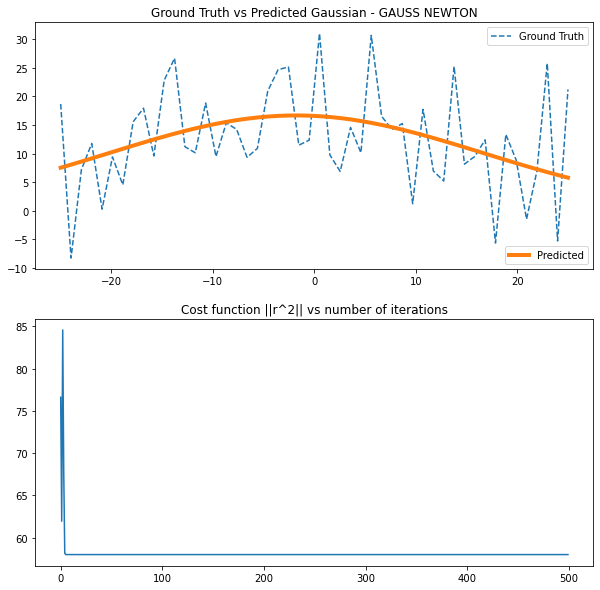

*********************************************************************
LM Algorithm - ADDED NOISE WITH MEAN=5 & STANDARD DEV=10
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[16.96167213  3.19493909 22.82686562]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:25
Tolerance :1e-15
No of Observations:50
Lambda :0.001
Residual Error :78.31999121363594


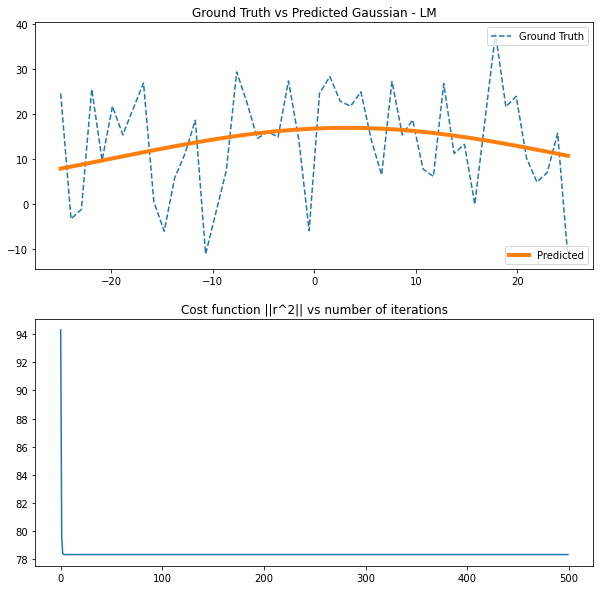

In [120]:
# Add noise to your observations
text = "ADDED NOISE WITH MEAN=5 & STANDARD DEV=10"
reintialize()

noise = True

no_iter = 500
Gradient_Descent(no_obs ,gt ,no_iter ,k_0 ,tol,text,noise)
Gauss_Newton(no_obs ,gt ,no_iter ,k_0 ,tol,text,noise)
lambda_ = 0.001
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text,noise)

### Effect of noise with mean of 5 and Standard deviation of 10

On adding a noise factor to the observations with mean=5 and standard deviation=10, the following are the predicted values observed for each algorithm:
* Gradient Descent - [14.38322675  1.63312198 25.21536278]
* Gauss Newton     - [ 16.6678692   -1.7905271  -18.39186733]
* LM Algorithm     - [16.96167213  3.19493909 22.82686562]

The residual errors are:
* Gradient Descent - 58.18
* Gauss Newton     - 57.9
* LM Algorithm     - 78.31

The ground truth values are [10 0 20], from the above observations we can see that Gauss Newton is least affected by noise in the observations.


# USING DIFFERENT INITIAL LAMBDA

*********************************************************************
LM Algorithm - LAMBDA = 0.00001
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[1.00000000e+01 3.77275682e-16 2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:8
Tolerance :1e-15
No of Observations:50
Lambda :1e-05
Residual Error :1.7763568394002505e-15


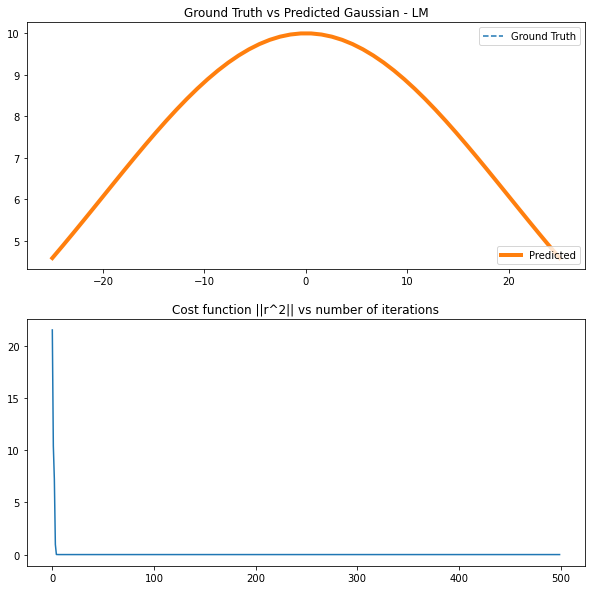

*********************************************************************
LM Algorithm - LAMBDA = 1000000
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[ 1.00000000e+01 -1.93381828e-16  2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:19
Tolerance :1e-15
No of Observations:50
Lambda :100000000000
Residual Error :0.0


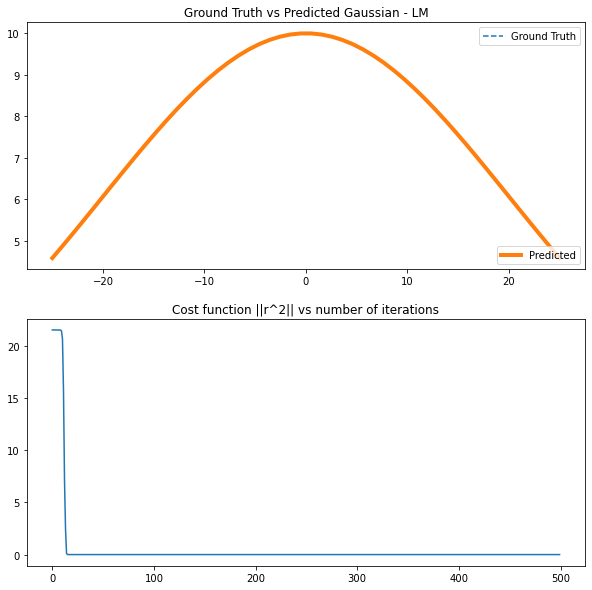

*********************************************************************
LM Algorithm - LAMBDA = 5
*********************************************************************
Ground Truth a,m,s values:[10, 0, 20]
Predicted a,m,s values:[[1.00000000e+01 2.04641601e-16 2.00000000e+01]]
Initial Estimate:[[10.   13.   19.12]]
No of iterations to converge:9
Tolerance :1e-15
No of Observations:50
Lambda :5
Residual Error :0.0


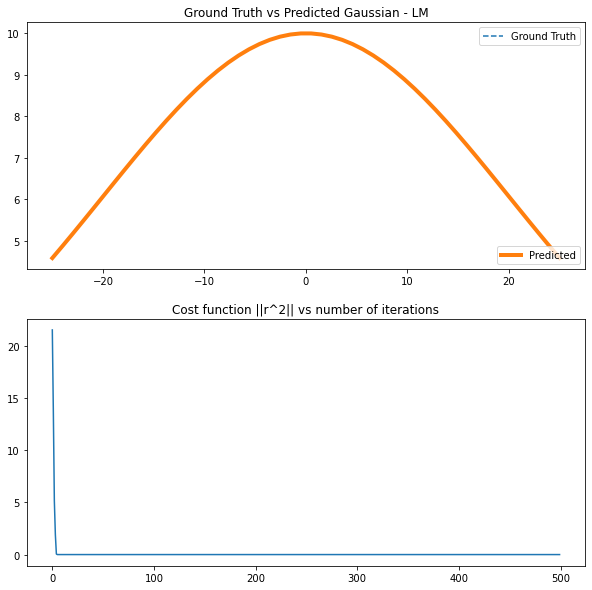

In [121]:
# Other observations
#Changing lambda value 

reintialize()

text = "LAMBDA = 0.00001"
lambda_ = 0.00001
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)
lambda_ = 100000000000
text = "LAMBDA = 1000000"
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)
lambda_ = 5
text = "LAMBDA = 5"
LM_algo(no_obs ,gt ,no_iter ,k_0 ,tol,lambda_,text)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

### Changing Lambda Value

On increasing the lambda value to 1000000, it is observed that LM algortihm does not converge at all and the cost function plot is a steep linearly decreasing slope. Whereas when the lambda value is 0.00001, LM algorithm behaves very close to Gauss Newton algorithm and converges effectively. 

# Answers for Question 1

### (**NOTE : Explanation from observations has been given alongside the plots  )

To solve the non-linear least squares problem, these three Algorithms used along with their convergence criteria was used:
* **Gradient Descent** - In Gradient Descent algorithm, we reduce the sum of squared error (residual error) by updating the parameters in the steepest direction. The following update rule was used:  
\begin{equation}
\Delta \mathbf{k} = - \alpha \mathbf{J_F} = -\alpha \mathbf{J}_r^{\top} {r}(\mathbf{k}) \\
\mathbf{k}^{t+1} = \mathbf{k}^t + \Delta \mathbf{k}
\end{equation}

* The convergence criteria is satisfied either when the sum of squared error ($\|r\|^2$) reaches below a tolerance value of 1e-15 or by reaching the maximum number of iterations.


* **Gauss Newton Algorithm** - In this algorithm, we also use curvature information along with slope to calculate the next step , unlike the gradient descent algorithm which uses only the gradient to find the next step. The following update rule was used:  
\begin{equation}
\mathbf{J}^{\top} \mathbf{J} \Delta \mathbf{x}=  -\mathbf{J}^{\top} \mathbf{f}(\mathbf{x})
\end{equation}
* The convergence criteria used was when the parameter update is :
\begin{equation}
\Delta \mathbf{k} < 1e-15
\end{equation}


* **Levenberg–Marquardt Algorithm** -  The following update rule was used:  
\begin{equation}
\left(\mathbf{J}^{\top} \mathbf{J}+\lambda \mathbf{I}\right) \Delta \mathbf{x}= -\mathbf{J}^{\top} \mathbf{f}(\mathbf{x})
\end{equation}
* The convergence criteria used was when the parameter update is :
\begin{equation}
\Delta \mathbf{k} < 1e-15
\end{equation}


### Answer for 1.1

#### Gradient Descent with different number of iterations 
In Gradient Descent algorithm, we reduce the sum of squared error (residual error) by updating the parameters in the steepest direction. 
\begin{equation}
\Delta \mathbf{k} = - \alpha \mathbf{J_F} 
\end{equation}

It is observed from the cost function graph that residual error reduces with number of iterations.

A suitable learning rate of 0.01 was fixed which determines the length of each step while moving in the direction of descent.

We have plotted for both 450 and 200 iterations after keeping the other hyperparameters constant. In Gradient Descent algorithm, we reduce the sum of squared error (residual error) by updating the parameters in the steepest direction. From above, the least square curve fits better on going through more number of iterations as the on each iteration, the parameters get updated in such a way the residual error becomes closer to zero.

| No of iterations | Residual Error| 
| ---------------- |:-------------:| 
|  100             |   3.484       | 
|  300             |   1.348       | 
|  450             |   0.087       | 

### Answer for 1.2
#### Gradient Descent , Gauss Newton Algorithm & LM Algorithm - Best Hyperparameters
By experimenting and tuning hyperparameters for Gauss Newton and Levenberg–Marquardt algorithm, similar hyperparameters were fixed for both the algorithms with an additional lambda term (damping coefficient) of 5 for the LM algorithm. 

|Algorithm      |Pred_a|Pred_m |Pred_s | Gt_a| Gt_m | Gt_s| iters_to_converge| LR| Lamdbda|Tolerance|Residual Error|Initial Est|
| ------------- |:------:| -----:|------:|----:|-----:|----:|----:|----:|----:|----:|----:|----:|
| Gradient Descent |9.98| 2e-04|20.07|10|0|20|450|0.01| - |1e-15|0.087|10,13,19.12|
| Gauss Newton |10| -5.055e-16|20.0|10|0|20|8|-| - |1e-15|1.77-15|10,13,19.12|
| LM Algorithm |10| 2.046e-16|20.0|10|0|20|9|-| 5 |1e-15|0|10,13,19.12|


We observed that Gauss Newton converges fastest among all three within 8 iterations. Gauss Newton generally converges faster with a good initial estimate.
We observed Gradient descent takes longest to converge (450 iterations) among all three algorithms.

The final predicted values for each algorithm is: 
* Gradient Descent - [9.98 2.71904013e-04 2.00778781e+01]
* Gauss Newton - [10 -5.05508616e-16 20]
* LM Algorithm - [10 2.04641601e-16  20]

LM Algorithm has predicted values that are a bit closer to the ground truth than Gauss Newton.

Convergence criterion used for both algorithms is when the update parameter (del_k) reaches below a tolerance value of 1e-15 or when it reaches maximum number of iterations.

Levenberg–Marquardt algorithm being a combination of both the gradient descent and Gauss Newton algorithm. When the damping parameter is large, it behave more like gradient descent otherwise becomes similar to Gauss Newton.
Here, initial lambda being 5, LM behaves similar to gradient descent in the beginning, then later the error is evaluated with the new estimated parameter.

If the error increased as a result of an update, then the step is retracted and the parameters are reset to their previous values and lambda is increased by a factor of 10. 
But if the error has decreased as a result of the update, then the new parameters are used and lambda is decreased by a factor of 10. This is done till convergence.

An inital estimate of 10,13,19.12 close to the ground truth was chosen. It is generally observed that there is better convergence on carefully choosing an intial estimate close to the actual value.


### Using an intial estimate far from ground truth

Graphs were plotted using an intial estimate of [100  10 125] far from the ground truth value of [10, 0, 20].

We can observe from above that the LM algorithm is least hindered among all three by the change in intial estimate. It is observed that LM algorithm converges within 9 iterations. Only LM algortihm has a curve fitting plot, this could be due to the robust nature of LM algorithm. Gradient descent and Gauss Newton do not converge at all in comparison to LM algorithm.

However on trying with an initial estimate of [100 100 200] extremely far from the ground truth, it was observed that there was no convergence for all three algorithms.

|Algorithm| Pred_a|Pred_m |Pred_s | Residual Error| Initial Est|
|--------|:------:|------:|------:| ------:| ------:| 
|Gradient Descent|    9.3| 115.2| 191.9       |   12.54       |  100 ,100 ,200|
|Gauss Newton|     7.8   | 4.9e+06 | 1.17e+08         |   12.37       |  100 ,100 ,200|
|LM Algorithm|        10 | -7.6e-16 | 20     |   3.32       |  100 ,100 ,200|
|Gradient Descent|   7.95 | 14.07 | 123.62    |   12.05       |  100 ,10 ,125|
|Gauss Newton|    7.8 | 4.76e+18 | -4.5e+19        |   12.37       |  100 ,10 ,125|
|LM Algorithm|       10| -4.2e-16 | 20    |   0.0       |  100 ,10 ,125|


### Reducing Number of Observations

We can observe from the above three graphs that reducing the number of observations to 6 values has lesser effect on both Gauss Newton and LM algorithm in comparison to Gradient Descent. LM algorithm was tested with lambda=5.
Even after 500 iterations of Gradient Descent, it is observed with less convergence, whereas the Gauss Newton  and LM algorithm converged in just 7 and 9 iterations respectively.

|Algorithm| No of observations|No of iterations|Lambda| Residual Error| 
|--------|:------------------:| --------------:| ------:| ------:| 
|Gradient Descent|           6| 500  | -   | 2.05       | 
|Gauss Newton|               6| 7    | 5 | 0.0       | 
|LM Algorithm|               6|9     |  -  |    0.0     | 

From the above results, we can conclude that Gauss Newton and LM algorithm are the best algorithms among all three that are able to generalize well even with less amount of data provided. 



### Effect of noise with mean of 5 and Standard deviation of 10

On adding a noise factor to the observations with mean=5 and standard deviation=10, the following are the predicted values observed for each algorithm:


|Algorithm| Pred_a|Pred_m |Pred_s | Residual Error| 
|--------|:------:|------:|------:| ------:| 
|Gradient Descent|     14.38 | 1.6 |25.21  |   58.1       | 
|Gauss Newton|       16.6  | -1.79 | -18.39 |   57.98      | 
|LM Algorithm|       16.96 | 3.19| 22.82 |  78.3       | 


The ground truth values are [10 0 20], from the above observations we can see that Gauss Newton algorithm is least affected by noise in the observations.

### Changing Initial Lambda Value

| Lambda           | No of iterations| 
| ---------------- |:-------------:| 
|      0.00001         |   8       | 
|       1000000        |   19    | 
|          5     |       9  | 

When the initial lambda value is 0.00001, LM algorithm behaves very close to Gauss Newton algorithm and converges very quickly, compared to the other initialisations . 

# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [6]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():

    # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])

    # add noise
    P = X + 0.05 * np.random.normal(0, 1, X.shape)

    # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1

    # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])

    # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)

    return X, P1, P2

In [69]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
X, P1, P2 = generate_data()

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P,num_iter):
    
    P0 = P #Initialization
    
        
    for i in range(num_iter):
        # implementing ICP:        
        
        X_c = np.mean(X, axis=1)
        P_c = np.mean(P, axis=1)
        
        X_ = np.array([X_i - X_c for X_i in X.T]).T
        P_ = np.array([P_i - P_c for P_i in P.T]).T
        
        W = X_@P_.T
        U, D, VT = np.linalg.svd(W)
        
        
        # TODO2.1: what's current error?
        rmse = np.sqrt(np.mean((X - P)**2))
        print(rmse)
        
        # TODO2.2: call visualization helper function plot_icp.
        plot_icp(X, P, P0, i, rmse)
        
        # TODO2.3: Implement ICP to get R, t
        
        R = U@VT.T
        t = X_c - R@P_c
        
        
        #transforming my current point cloud towards initial point cloud
        for i in range(16):
            P[:,i] = R@P[:,i] + t 
            
            
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

1.7330223767199338


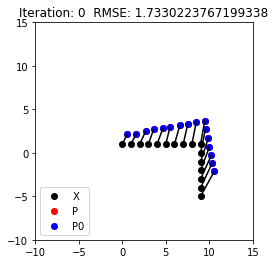

0.04839038618383505


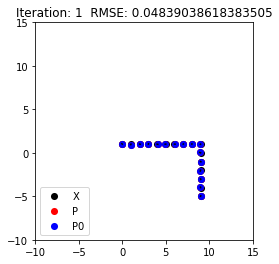

9.222030779556254


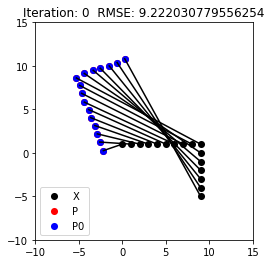

0.055238145938884244


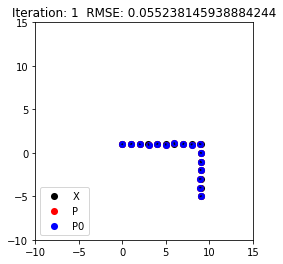

In [70]:
# Call ICP on P1 & P2

num_iter = 2 #Experiment & check if your theoretical understanding is correct.
ICP(X,P1,num_iter) #Uncomment this
X, P1, P2 = generate_data()
num_iter = 2 #Experiment & check if your theoretical understanding is correct.
ICP(X,P2,num_iter) #Uncomment this